In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Chargement du fichier CSV :
file_path = "cumulative.csv"
df = pd.read_csv(file_path)
df = pd.DataFrame(df)



In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [8]:
print(df.shape)

(9564, 50)


In [10]:
# Afficher les premières lignes du dataset
display(df.head())

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [12]:
# Afficher des informations générales sur le dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [14]:
# Statistiques descriptives
display(df.describe())


,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [16]:
# Variable categorielles
df.describe(include = ['O'])

,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_tce_delivname
count,9564,2294,9564,9564,9218
unique,9564,2294,3,2,3
top,K00752.01,Kepler-227 b,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
freq,1,1,5023,5068,8054


In [18]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [20]:
#Selectioner uniquement les collones numeriques
numeric_df = df.select_dtypes(include=[np.number])

# Calcul de Q1, Q3 et IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identification et comptage des bornes inférieure et supérieure pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Initialiser un dictionaire pour stocker le nombre des outliers par colonne
outlier_counts = {}

# Identification et comptage des outliers par colonne
for column in numeric_df.columns:
    lower_outliners_count = numeric_df[numeric_df[column] < lower_bound[column]][column].count()
    upper_outliners_count = numeric_df[numeric_df[column] > upper_bound[column]][column].count()
    outlier_counts[column] = lower_outliners_count + upper_outliners_count

# Affichage du nombre des outliers par colonne
for column, count in outlier_counts.items():
    print(f"Nombre des outliers dans la colonne '{column}': {count}")

Nombre des outliers dans la colonne 'rowid': 0
Nombre des outliers dans la colonne 'kepid': 0
Nombre des outliers dans la colonne 'koi_score': 0
Nombre des outliers dans la colonne 'koi_fpflag_nt': 1800
Nombre des outliers dans la colonne 'koi_fpflag_ss': 2215
Nombre des outliers dans la colonne 'koi_fpflag_co': 1864
Nombre des outliers dans la colonne 'koi_fpflag_ec': 1148
Nombre des outliers dans la colonne 'koi_period': 1567
Nombre des outliers dans la colonne 'koi_period_err1': 1650
Nombre des outliers dans la colonne 'koi_period_err2': 1650
Nombre des outliers dans la colonne 'koi_time0bk': 1046
Nombre des outliers dans la colonne 'koi_time0bk_err1': 838
Nombre des outliers dans la colonne 'koi_time0bk_err2': 838
Nombre des outliers dans la colonne 'koi_impact': 82
Nombre des outliers dans la colonne 'koi_impact_err1': 736
Nombre des outliers dans la colonne 'koi_impact_err2': 120
Nombre des outliers dans la colonne 'koi_duration': 869
Nombre des outliers dans la colonne 'koi_dura

Le but de projet sera de créer un modèle d apprentissage machine supervisé pout identifier les systemes solaires qui contient des exo-planètes. 
Dans cet cas, la variable cible sera 'koi_disposition'.
Dans la base des données originale la variable catégorielle 'koi_disposition' a trois valeurs : 
1.	Confirmed
2.	False positive 
3.	Candidate




In [175]:
koi_disposition_description = df['koi_disposition'].describe()
print(koi_disposition_description)


count               9564
unique                 3
top       FALSE POSITIVE
freq                5023
Name: koi_disposition, dtype: object


Matrice de correlation: 



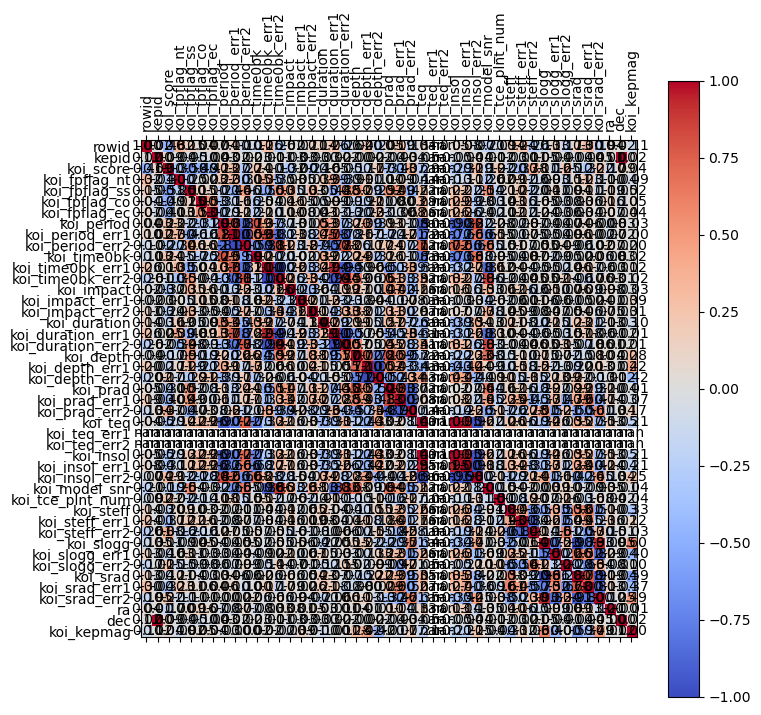

In [44]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr(method='spearman')
#target_correlations = correlation_matrix['koi_disposition']
print("Matrice de correlation: \n",)
correlation_matrix
# Creer une figure et un axe
fig, ax = plt.subplots(figsize=(8, 8))

# Afficher la matrice de correlation avec imshow
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Ajouter une barre de couleur
fig.colorbar(cax)
# Definir les etiquettes des axes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

# Rotation des étiquettes de l'axe pour une meilleure lisibilité

plt.xticks(rotation=90)


# Afficher les valeurs de correlation sur la matrice
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i,j]:.2f}",
                  ha="center", va="center", color="black")
plt.show()

In [46]:
correlation_matrix

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,1.000000,0.017586,-0.461564,0.316824,0.150513,0.037656,0.071214,0.037070,0.098344,-0.098344,...,-0.256904,-0.127971,0.126370,-0.174888,0.134511,0.296758,-0.189581,0.040571,0.017324,-0.111619
kepid,0.017586,1.000000,0.091995,-0.038045,-0.048835,-0.098857,-0.043892,0.033280,0.015143,-0.015143,...,0.007623,0.045273,-0.040708,-0.014317,-0.042149,-0.037784,0.048952,0.006692,0.999931,0.015202
koi_score,-0.461564,0.091995,1.000000,-0.295170,-0.577928,-0.494196,-0.407478,0.230710,0.271750,-0.271750,...,0.376770,0.108212,-0.156432,0.246267,-0.117246,-0.323344,0.215878,-0.165661,0.093262,0.040551
koi_fpflag_nt,0.316824,-0.038045,-0.295170,1.000000,-0.253562,-0.020810,0.027112,0.216914,0.295657,-0.295657,...,-0.163895,-0.091441,0.034255,-0.149699,0.105471,0.229943,-0.111668,0.004717,-0.038094,-0.092738
koi_fpflag_ss,0.150513,-0.048835,-0.577928,-0.253562,1.000000,0.149733,0.100001,-0.205586,-0.464450,0.464450,...,-0.200881,-0.042297,0.113314,-0.087940,0.037537,0.111831,-0.107343,0.088323,-0.049365,0.015003
koi_fpflag_co,0.037656,-0.098857,-0.494196,-0.020810,0.149733,1.000000,0.525684,-0.314147,-0.160843,0.160843,...,-0.159331,0.045953,-0.031908,-0.079519,-0.034399,0.061830,-0.013675,0.155982,-0.099966,0.053959
koi_fpflag_ec,0.071214,-0.043892,-0.407478,0.027112,0.100001,0.525684,1.000000,-0.285209,-0.122848,0.122848,...,-0.116912,0.043246,-0.027265,-0.058241,-0.032987,0.038181,-0.000700,0.065791,-0.044378,0.040456
koi_period,0.037070,0.033280,0.230710,0.216914,-0.205586,-0.314147,-0.285209,1.000000,0.807337,-0.807337,...,0.071214,-0.039162,-0.036686,-0.069264,0.039280,0.058499,-0.004025,-0.082499,0.033952,-0.026007
koi_period_err1,0.098344,0.015143,0.271750,0.295657,-0.464450,-0.160843,-0.122848,0.807337,1.000000,-1.000000,...,0.052286,-0.048493,-0.042922,-0.088836,0.055655,0.099506,-0.021668,-0.071315,0.015693,-0.003194
koi_period_err2,-0.098344,-0.015143,-0.271750,-0.295657,0.464450,0.160843,0.122848,-0.807337,-1.000000,1.000000,...,-0.052286,0.048493,0.042922,0.088836,-0.055655,-0.099506,0.021668,0.071315,-0.015693,0.003194
